<a href="https://colab.research.google.com/github/YMGYM/python_deeplearning_pytorch/blob/main/Pytorch_part1~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

이 노트북은 `파이썬 딥러닝 파이토치` 책의 연습코드입니다.

코드는 [이곳](https://github.com/Justin-A/DeepLearning101) 에서 전문을 확인 가능합니다.

이 노트북은 1장~ 내용을 다루고 있습니다.

# 파이토치 기초

## 환경 구축 및 토치 설치

Google Colab을 통해 진행하기 때문에 이 부분은 생략하겠다.

Colab에는 Torch가 이미 설치되어 있다.

In [ ]:
import torch

torch.__version__ # 토치의 버전을 확인하는 코드

'1.7.0+cu101'

## 1 - 4 반드시 알아야 하는 파이토치 스킬

### 1) 텐서

#### Scalar
상수값. (차원이 없는 값)

파이썬의 기본연산자와 `torch` 메소드를 통해 사용이 가능하다.

In [ ]:
import torch
scalar1 = torch.tensor([1.])
scalar2 = torch.tensor([3.])

print(scalar1)
print(scalar2)

tensor([1.])
tensor([3.])


In [ ]:
# 사칙연산자
add_scalar = scalar1 + scalar2
print(add_scalar)

sub_scalar = scalar1 - scalar2
print(sub_scalar)

mul_scalar = scalar1 * scalar2
print(mul_scalar)

div_scalar = scalar1 / scalar2
print(div_scalar)

tensor([4.])
tensor([-2.])
tensor([3.])
tensor([0.3333])


In [ ]:
# torch 모듈의 메소드로 연산 위와 결과가 같다.
print(torch.add(scalar1, scalar2))
print(torch.sub(scalar1, scalar2))
print(torch.mul(scalar1, scalar2))
print(torch.div(scalar1, scalar2))

tensor([4.])
tensor([-2.])
tensor([3.])
tensor([0.3333])


#### Vector

값을 2개 이상의 수치로 표현하는 방법

스칼라 사칙연산과 동일한 방법으로 연산이 가능하나, 사칙연산의 경우 element-wise 하게 계산됨

In [ ]:
 # 벡터 정의
 vector1 = torch.tensor([1., 2., 3.])
 vector2 = torch.tensor([4., 5., 6.])

 print(vector1)
 print(vector2)

tensor([1., 2., 3.])
tensor([4., 5., 6.])


In [ ]:
# 벡터와 사칙연산자
add_vector = vector1 + vector2
print(add_vector)

sub_vector = vector1 - vector2
print(sub_vector)

mul_vector = vector1 * vector2 # element-wise 하게 계산
print(mul_vector)

div_vector = vector1 / vector2 # element-wise 하게 계산
print(div_vector)

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])


In [ ]:
# 내장 메소드를 사용한 연산
print(torch.add(vector1, vector2))
print(torch.sub(vector1, vector2))
print(torch.mul(vector1, vector2)) # element-wise 하게 계산
print(torch.div(vector1, vector2)) # element-wise 하게 계산

# 벡터 간 내적은 다음과 같이 계산
print(torch.dot(vector1, vector2)) 

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])
tensor(32.)


#### Matrix

행렬은 2개 이상의 벡터값을 통합해 구성된 값이다.

사칙 연산 또한 연산자와 내장 메소드로 구현이 가능하며, element-wise하게 계산된다.

In [ ]:
# 행렬 선언
matrix1 = torch.tensor([[1.,2.],[3.,4.]])
matrix2 = torch.tensor([[5.,6.],[7.,8.]])

print(matrix1)
print(matrix2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
# 행렬 간 사칙연산
add_matrix = matrix1 + matrix2
print(add_matrix)

sub_matrix = matrix1 - matrix2
print(sub_matrix)

mul_matrix = matrix1 * matrix2 # element-wise
print(mul_matrix)

div_matrix = matrix1 / matrix2 # element-wise
print(div_matrix)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


In [ ]:
# 내장 메소드를 사용한 연산과정
print(torch.add(matrix1, matrix2))
print(torch.sub(matrix1, matrix2))
print(torch.mul(matrix1, matrix2)) # element-wise
print(torch.div(matrix1, matrix2)) # element-wise

# 행렬의 곱연산 실행
print(torch.matmul(matrix1, matrix2))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
# TF에서는 Dot연산자를 사용해서도 되던데 토치도 가능할까?
torch.dot(matrix1, matrix2)

RuntimeError: ignored

안된다..ㅋㅋㅋ

Torch에서는 2차원 이상의 데이터는 `torch.matmul`을 사용할 필요가 있어 보인다

#### Tensor

텐서는 2차원 이상의 배열이라 표현.

마찬가지로 사칙연산자와 내장 메소드를 사용해 계산이 가능하며, element-wise 하게 계산된다.

In [ ]:
tensor1 = torch.tensor([[[1.,2.],[3.,4.]], [[5.,6.],[7.,8.]]])
print(tensor1)

print(tensor1.shape) # numpy의 shape메소드를 확인하는 게 아니다..

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
torch.Size([2, 2, 2])


In [ ]:
tensor2 = torch.tensor([[[9.,10.],[11.,12.]],[[13.,14.], [15.,16.]]])
print(tensor2)

tensor([[[ 9., 10.],
         [11., 12.]],

        [[13., 14.],
         [15., 16.]]])


In [ ]:
# 사칙연산자를 사용한 연산
add_tensor = tensor1 + tensor2
print(add_tensor)

sub_tensor = tensor1 - tensor2
print(sub_tensor)

mul_tensor = tensor1 * tensor2 # element-wise 하게 계산됨
print(mul_tensor)

div_tensor = tensor1 / tensor2 # element-wise 하게 계산됨
print(div_tensor)

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])
tensor([[[-8., -8.],
         [-8., -8.]],

        [[-8., -8.],
         [-8., -8.]]])
tensor([[[  9.,  20.],
         [ 33.,  48.]],

        [[ 65.,  84.],
         [105., 128.]]])
tensor([[[0.1111, 0.2000],
         [0.2727, 0.3333]],

        [[0.3846, 0.4286],
         [0.4667, 0.5000]]])


In [ ]:
# 내장 연산자를 사용해 계산
print(torch.add(tensor1, tensor2))
print(torch.sub(tensor1, tensor2))
print(torch.mul(tensor1, tensor2)) # element-wise
print(torch.div(tensor1, tensor2)) # element-wise

# 내적합
multed_tensor = torch.matmul(tensor1, tensor2)
print(multed_tensor)

print(multed_tensor.shape) # shape 확인

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])
tensor([[[-8., -8.],
         [-8., -8.]],

        [[-8., -8.],
         [-8., -8.]]])
tensor([[[  9.,  20.],
         [ 33.,  48.]],

        [[ 65.,  84.],
         [105., 128.]]])
tensor([[[0.1111, 0.2000],
         [0.2727, 0.3333]],

        [[0.3846, 0.4286],
         [0.4667, 0.5000]]])
tensor([[[ 31.,  34.],
         [ 71.,  78.]],

        [[155., 166.],
         [211., 226.]]])
torch.Size([2, 2, 2])


3차원 텐서의 계산 과정은 다음과 같다
```plain
[
  [
    [1*9  + 2*11] [1*10 + 2*12]
    [5*13 + 6*15] [5*14 + 6*16]
                                ]
  [
    [3*9  + 4*11] [3*10 + 4*12]
    [7*13 + 8*15] [7*14 + 8*16]
                                ]
                                  ]
```

앞 차원을 그대로 두고 하위 2개의 차원의 matmul이다.

#### AutoGrad

In [ ]:
# Devise 설정
import torch

if torch.cuda.is_available():
  print("use cuda")
  DEVICE = torch.device('cuda')
else:
  print("use cpu")
  DEVICE = torch.device('cpu')

use cpu


In [ ]:
# hyperparameter 설정
BATCH_SIZE = 64
INPUT_SIZE = 1000 
HIDDEN_SIZE = 100 # (1000, 100) 짜리 히든 레이어와 (100,10) 짜리 히든레이어 생성을 위함
OUTPUT_SIZE = 10

In [ ]:
# 레이어 생성
x = torch.randn(BATCH_SIZE, INPUT_SIZE, device=DEVICE, dtype=torch.float, requires_grad=False) # 단순한 input이므로 gradient 가 필요 없다.
y = torch.randn(BATCH_SIZE, OUTPUT_SIZE, device=DEVICE, dtype=torch.float, requires_grad=False) # 단순한 output이므로 gradient 가 필요 없다.

w1 = torch.randn(INPUT_SIZE, HIDDEN_SIZE, device=DEVICE, dtype=torch.float, requires_grad=True) # 가중치 갱신을 위해
w2 = torch.randn(HIDDEN_SIZE, OUTPUT_SIZE, device=DEVICE, dtype=torch.float, requires_grad=True)

In [ ]:
# 학습?
learning_rate = 1e-6
for t in range(1, 501):
  y_pred = x.mm(w1).clamp(min = 0).mm(w2) # 순전파 계산. clamp는 reLU와 같은 역할을 하는듯 (비선형 활성화 함수)

  loss = (y_pred - y).pow(2).sum() # MSE 오차.

  if t % 100 == 0:
    print("Iteration: ", t, "\t", "Loss: ", loss.item()) # 100번 반복 시 loss값 모니터링
  loss.backward() # 각 파라미터 값에 대해 Gradient를 구하고 역전파를 진행할 수 있게 결과를 반환.

  with torch.no_grad(): # 해당 블록을 history tracking 하지 않겠다는 뜻이다.
    w1 -= learning_rate * w1.grad # optimization진행
    w2 -= learning_rate * w2.grad

    # w1.grad.zero_() # Gradient값을 다시 0으로 설정해 둠.
    # w2.grad.zero_()

Iteration:  100 	 Loss:  2024127.125
Iteration:  200 	 Loss:  nan
Iteration:  300 	 Loss:  nan
Iteration:  400 	 Loss:  nan
Iteration:  500 	 Loss:  nan


In [ ]:
y - y_pred # 상당히 작은 수들이 출력되는 것을 확인할 수 있다.

In [ ]:
w1.grad # gradient를 호출하는 메소드이다...

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
y.grad # gradient를 설정하지 않으면 None값이 반환되는 듯 하다.

# AI Background

## MNIST 데이터를 활용한 Multi Layer Perceptron 설계

In [ ]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn # torch 모듈 중 인공신경망을 설계할 때 필요한 함수를 모아 놓은 모듈
import torch.nn.functional as F
from torchvision import transforms, datasets # 비전 연구 분야에서 자주 이용하는 함수

In [ ]:
# 장비 확인
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print("Using PyTorch Version:", torch.__version__, 'Device: ', DEVICE)

Using PyTorch Version: 1.7.0+cu101 Device:  cpu


In [ ]:
# 하이퍼파라미터 설정
BATCH_SIZE = 32 # 32개의 데이터가 1 미니배치를 구성하고 있다.
EPOCHS = 10

In [ ]:
# MNIST 데이터 다운로드
train_dataset = datasets.MNIST(root = '../data/MNIST', train= True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = '../data/MNIST', train= False, transform = transforms.ToTensor())
# transforms 속성은 데이터 정규화, 텐서로 변환 등...
# download 속성은 아예 저장할 것인지, 값만 사용할 것인지..
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle=False)
# datagenerator와 비슷하다.

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# 데이터 확인하기
for (X_train, y_train) in train_loader:
  print(f"X_train : {X_train.size()}, type: {X_train.type()}")
  print(f"y_train : {y_train.size()}, type: {y_train.type()}")
  break

X_train : torch.Size([32, 1, 28, 28]), type: torch.FloatTensor
y_train : torch.Size([32]), type: torch.LongTensor


이미지 쉐이프가 [32,1,28,28] 이므로
채널이 1임을 확인할 수 있다. (grayscale)

x와 y의 데이터타입이 다른 것도 눈여겨 볼 점

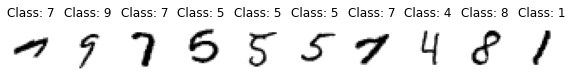

In [ ]:
# 데이터 확인하기
pltsize =1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28,28), cmap="gray_r")
  plt.title("Class: " + str(y_train[i].item()))

In [ ]:
# MLP 모델 생성하기
class Net(nn.Module): # nn.Module는 딥러닝 기본 함수를 포함
  def __init__(self):
    super(Net, self).__init__() # nn.Module 내의 메소드의 init 사용. python2 와의 호환을 위해 이 형태로 적음.super().init()도 같이 동작
    self.fc1 = nn.Linear(28 * 28, 512) # 레이어 정의
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
  
  def forward(self, X): # 순전파 연산
    x = X.view(-1,28 * 28) # 1차원의 데이터로 flatten해 주어야 함.
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [ ]:
n = Net()

In [ ]:
n

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
# model, optimizer, objective function 설정
model = Net().to(DEVICE) # DEVICE 에 할당해 주어야 한다.

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.5) # 옵티마이저 정의 방식에 주의
criterion = nn.CrossEntropyLoss() # CrossEntropy를 사용해 계산
model

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
# 모델 학습을 진행하며 학습 데이터에 대한 성능 확인
def train(model, train_loader, optimizer, log_interval):
  model.train() # 모델을 학습상태로 지정

  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE) # 이미지와 레이블을 장치에 할당
    label = label.to(DEVICE)

    optimizer.zero_grad() # optimizer의 gradient 를 초기화해줌
    output = model(image) # 순전파  - 모델의 __call__()에서 forward()를 호출하기 때문에, forward()를 직접 호출하지 않는다.

    loss = criterion(output, label) 
    loss.backward() # autograd의 역전파
    optimizer.step() # 업데이트함

    if batch_idx % log_interval == 0:
      print(f"Train epoch: {Epoch}, [{batch_idx * len(image)} / {len(train_loader.dataset)}({100. * batch_idx / len(train_loader):.3f}%)]\t Train Loss: {loss.item()}")

In [ ]:
# 데이터 검증하는 메소드 정의
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE) # 이미지 할당
      output = model(image) # 순전파

      test_loss += criterion(output, label)
      prediction = output.max(1, keepdim=True)[1] # 모델의 데이터값은 크기가 10인 벡터. argmax를 판단함.
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset) # 현재 test_loader에 존재하는 미니배치의 개수로 평균을 구함

  return test_loss, test_accuracy

In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n [Epoch {Epoch}] \nTest Loss: {test_loss:.4f},\t Test Accuracy: {test_accuracy:.4f}\n")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train epoch: 1, [0 / 60000(0.0%)]	 Train Loss: 2.3792006969451904
Train epoch: 1, [6400 / 60000(10.666666666666666%)]	 Train Loss: 2.3355743885040283
Train epoch: 1, [12800 / 60000(21.333333333333332%)]	 Train Loss: 2.2631354331970215
Train epoch: 1, [19200 / 60000(32.0%)]	 Train Loss: 2.282989978790283
Train epoch: 1, [25600 / 60000(42.666666666666664%)]	 Train Loss: 2.2601640224456787
Train epoch: 1, [32000 / 60000(53.333333333333336%)]	 Train Loss: 2.308326244354248
Train epoch: 1, [38400 / 60000(64.0%)]	 Train Loss: 2.285688638687134
Train epoch: 1, [44800 / 60000(74.66666666666667%)]	 Train Loss: 2.2861902713775635
Train epoch: 1, [51200 / 60000(85.33333333333333%)]	 Train Loss: 2.237779378890991
Train epoch: 1, [57600 / 60000(96.0%)]	 Train Loss: 2.2855725288391113

 [Epoch 1] 
Test Loss: 0.0697,	 Test Accuracy: 28.7600

Train epoch: 2, [0 / 60000(0.0%)]	 Train Loss: 2.224231004714966
Train epoch: 2, [6400 / 60000(10.666666666666666%)]	 Train Loss: 2.2148900032043457
Train epoch:

학습 결과 모델의 정확도는 약 90% 정도를 보였다.

# Deep Learning

## 3-4 딥러닝의 발전을 이끈 알고리즘

### Dropout

RandomForest와 비슷하게 적용.

일부 columns을 0으로 취급하여 계산함

In [ ]:
# dropout 부분만 따로 작승
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5 # 드롭아웃 확률을 0.5

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training=self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training=self.training, p= self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

In [ ]:
# model, optimizer, objective function 설정
model = Net().to(DEVICE) # DEVICE 에 할당해 주어야 한다.

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.5) # 옵티마이저 정의 방식에 주의
criterion = nn.CrossEntropyLoss() # CrossEntropy를 사용해 계산

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n [Epoch {Epoch}] \nTest Loss: {test_loss:.4f},\t Test Accuracy: {test_accuracy:.4f}\n")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train epoch: 1, [0 / 60000(0.000%)]	 Train Loss: 2.444450616836548
Train epoch: 1, [6400 / 60000(10.667%)]	 Train Loss: 2.3370656967163086
Train epoch: 1, [12800 / 60000(21.333%)]	 Train Loss: 2.3771824836730957
Train epoch: 1, [19200 / 60000(32.000%)]	 Train Loss: 2.3497965335845947
Train epoch: 1, [25600 / 60000(42.667%)]	 Train Loss: 2.2855257987976074
Train epoch: 1, [32000 / 60000(53.333%)]	 Train Loss: 2.3446109294891357
Train epoch: 1, [38400 / 60000(64.000%)]	 Train Loss: 2.3194069862365723
Train epoch: 1, [44800 / 60000(74.667%)]	 Train Loss: 2.3182222843170166
Train epoch: 1, [51200 / 60000(85.333%)]	 Train Loss: 2.27104115486145
Train epoch: 1, [57600 / 60000(96.000%)]	 Train Loss: 2.316202163696289

 [Epoch 1] 
Test Loss: 0.0713,	 Test Accuracy: 10.1400

Train epoch: 2, [0 / 60000(0.000%)]	 Train Loss: 2.2802820205688477
Train epoch: 2, [6400 / 60000(10.667%)]	 Train Loss: 2.2418107986450195
Train epoch: 2, [12800 / 60000(21.333%)]	 Train Loss: 2.2613070011138916
Train epoc

### Activation

Relu는 값이 0보다 크면 1 기울기를 반환, 아니면 기울기를 지워버린다.

In [ ]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn # torch 모듈 중 인공신경망을 설계할 때 필요한 함수를 모아 놓은 모듈
import torch.nn.functional as F
from torchvision import transforms, datasets # 비전 연구 분야에서 자주 이용하는 함수

In [ ]:
if torch. cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

In [ ]:
train_dataset = datasets.MNIST(root= "../data/MNIST", train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root="../data/MNIST", train=False, transform = transforms.ToTensor())

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle=False)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = F.dropout(x, training=self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = F.relu(x)
    x = F.dropout(x, training=self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

In [ ]:
# model, optimizer, objective function 설정
model = Net().to(DEVICE) # DEVICE 에 할당해 주어야 한다.

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.5) # 옵티마이저 정의 방식에 주의
criterion = nn.CrossEntropyLoss() # CrossEntropy를 사용해 계산

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n [Epoch {Epoch}] \nTest Loss: {test_loss:.4f},\t Test Accuracy: {test_accuracy:.4f}\n")

Train epoch: 1, [0 / 60000(0.000%)]	 Train Loss: 2.3119406700134277
Train epoch: 1, [6400 / 60000(10.667%)]	 Train Loss: 2.1094040870666504
Train epoch: 1, [12800 / 60000(21.333%)]	 Train Loss: 1.2658246755599976
Train epoch: 1, [19200 / 60000(32.000%)]	 Train Loss: 0.7956878542900085
Train epoch: 1, [25600 / 60000(42.667%)]	 Train Loss: 0.7076317667961121
Train epoch: 1, [32000 / 60000(53.333%)]	 Train Loss: 0.47512704133987427
Train epoch: 1, [38400 / 60000(64.000%)]	 Train Loss: 1.0035603046417236
Train epoch: 1, [44800 / 60000(74.667%)]	 Train Loss: 0.8458591103553772
Train epoch: 1, [51200 / 60000(85.333%)]	 Train Loss: 0.25709471106529236
Train epoch: 1, [57600 / 60000(96.000%)]	 Train Loss: 0.3203340768814087

 [Epoch 1] 
Test Loss: 0.0100,	 Test Accuracy: 90.8500

Train epoch: 2, [0 / 60000(0.000%)]	 Train Loss: 0.3157886564731598
Train epoch: 2, [6400 / 60000(10.667%)]	 Train Loss: 0.47069424390792847
Train epoch: 2, [12800 / 60000(21.333%)]	 Train Loss: 0.46050944924354553
Tr

### Batch-normalization

Internal Covariance Shift 를 감소시켜 학습 속도를 유지한다.


기본 정규화 방법
![기본](https://media.vlpt.us/images/jiselectric/post/8862ef9a-13a2-4402-8c80-1929d7c37083/0_PXGPVYIxyI_IEHP7.png)

배치 정규화
![정규화](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcFYkLE%2FbtqEcUnlXKy%2FZbGZNjObjo2gL2xss8zYzk%2Fimg.png)

In [2]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [3]:
if torch. cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

In [4]:
train_dataset = datasets.MNIST(root= "../data/MNIST", train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root="../data/MNIST", train=False, transform = transforms.ToTensor())

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
BATCH_SIZE = 32
EPOCHS = 10

In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset, BATCH_SIZE, True)
test_loader = torch.utils.data.DataLoader(test_dataset, BATCH_SIZE, False)

In [6]:
## 모델 설계
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

    self.dropout_prob = 0.5

    self.batch_norm1 = nn.BatchNorm1d(512) # 첫 fc layer의 output이 512임
    self.batch_norm2 = nn.BatchNorm1d(256)

  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.fc1(x)
    x = self.batch_norm1(x)
    x = F.sigmoid(x)
    x = F.dropout(x, p = self.dropout_prob, training = self.training)
    x = self.fc2(x)
    x = self.batch_norm2(x)
    x = F.sigmoid(x)
    x = F.dropout(x, p = self.dropout_prob, training = self.training)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [9]:
def train(model, loader, optimizer, log_interval ):
  model.train() # 모델을 학습상태로 변경함

  for batch_idx, (image, label) in enumerate(loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)

    optimizer.zero_grad() # 기울기를 0으로 초기화
    output = model(image)

    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(f"Train epoch : {Epoch} [{batch_idx * len(image) / len(loader.dataset):.6}, {100. * batch_idx / len(loader):.6} % ], Train loss : {loss.item()}")


In [10]:
def evaluate(model, loader):
  model.eval() # 테스트 상태로 변경
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)

      output = model(image)
      
      test_loss += criterion(output, label).item()
      
      prediction = output.max(1, keepdim = True)[1] # 예측 값중 가장 큰 값

      correct += prediction.eq(label.view_as(prediction)).sum().item()


  test_loss /= len(loader.dataset)
  test_acc = 100. * correct / len(loader.dataset)

  print(f"Test loss : {test_loss}, test_acc : {test_acc}")

  return test_loss, test_acc

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, 200)
  evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train epoch : 1 [0.0, 0.0 % ], Train loss : 0.270090252161026
Train epoch : 1 [0.106667, 10.6667 % ], Train loss : 0.4522574543952942
Train epoch : 1 [0.213333, 21.3333 % ], Train loss : 0.48431968688964844
Train epoch : 1 [0.32, 32.0 % ], Train loss : 0.7016597986221313
Train epoch : 1 [0.426667, 42.6667 % ], Train loss : 0.4275389313697815
Train epoch : 1 [0.533333, 53.3333 % ], Train loss : 0.4996999502182007
Train epoch : 1 [0.64, 64.0 % ], Train loss : 0.4781433045864105
Train epoch : 1 [0.746667, 74.6667 % ], Train loss : 0.5197855234146118
Train epoch : 1 [0.853333, 85.3333 % ], Train loss : 0.7181930541992188
Train epoch : 1 [0.96, 96.0 % ], Train loss : 0.33845290541648865
Test loss : 0.00930194703117013, test_acc : 91.49
Train epoch : 2 [0.0, 0.0 % ], Train loss : 0.4137119650840759
Train epoch : 2 [0.106667, 10.6667 % ], Train loss : 0.46099504828453064
Train epoch : 2 [0.213333, 21.3333 % ], Train loss : 0.5701290965080261
Train epoch : 2 [0.32, 32.0 % ], Train loss : 0.272

In [ ]:
a, b = train_dataset[0]
b

5

### Initialization

초기화 방법에 따른 학습 효율의 변화

학습의 시작점을 좋게 설정하여 학습이 좋은 방향으로 나아갈 수 있게 한다.

In [11]:
import torch.nn.init as init

def weight_init(m):
  if isinstance(m, nn.Linear):
    init.kaiming_uniform_(m.weight.data) # He Initalize을 의미한다. 기본값은 uniform 분포


model = Net().to(DEVICE)
model.apply(weight_init) # 적용 (nn.Module.apply 함수는 모든 서브모듈에 대해 callable 함수를 수행한 뒤 결과를 반환한다.)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, 200)
  evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train epoch : 1 [0.0, 0.0 % ], Train loss : 2.385364532470703
Train epoch : 1 [0.106667, 10.6667 % ], Train loss : 2.08713960647583
Train epoch : 1 [0.213333, 21.3333 % ], Train loss : 1.8251914978027344
Train epoch : 1 [0.32, 32.0 % ], Train loss : 1.7313677072525024
Train epoch : 1 [0.426667, 42.6667 % ], Train loss : 1.2944509983062744
Train epoch : 1 [0.533333, 53.3333 % ], Train loss : 1.3921513557434082
Train epoch : 1 [0.64, 64.0 % ], Train loss : 1.1009702682495117
Train epoch : 1 [0.746667, 74.6667 % ], Train loss : 1.112769365310669
Train epoch : 1 [0.853333, 85.3333 % ], Train loss : 1.0578850507736206
Train epoch : 1 [0.96, 96.0 % ], Train loss : 0.9628053903579712
Test loss : 0.019117114174366, test_acc : 85.99
Train epoch : 2 [0.0, 0.0 % ], Train loss : 0.8614552617073059
Train epoch : 2 [0.106667, 10.6667 % ], Train loss : 1.0122395753860474
Train epoch : 2 [0.213333, 21.3333 % ], Train loss : 1.0830011367797852
Train epoch : 2 [0.32, 32.0 % ], Train loss : 0.88416355848


### Optimizer



In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) # Adam 으로 젼환

In [13]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, 200)
  evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train epoch : 1 [0.0, 0.0 % ], Train loss : 0.33708932995796204
Train epoch : 1 [0.106667, 10.6667 % ], Train loss : 0.8208688497543335
Train epoch : 1 [0.213333, 21.3333 % ], Train loss : 0.7519791126251221
Train epoch : 1 [0.32, 32.0 % ], Train loss : 0.6201186776161194
Train epoch : 1 [0.426667, 42.6667 % ], Train loss : 0.32119593024253845
Train epoch : 1 [0.533333, 53.3333 % ], Train loss : 0.5267834663391113
Train epoch : 1 [0.64, 64.0 % ], Train loss : 0.4201321601867676
Train epoch : 1 [0.746667, 74.6667 % ], Train loss : 0.5722525119781494
Train epoch : 1 [0.853333, 85.3333 % ], Train loss : 0.21929289400577545
Train epoch : 1 [0.96, 96.0 % ], Train loss : 0.19631212949752808
Test loss : 0.006923355108965188, test_acc : 92.99
Train epoch : 2 [0.0, 0.0 % ], Train loss : 0.04951409995555878
Train epoch : 2 [0.106667, 10.6667 % ], Train loss : 0.4319005012512207
Train epoch : 2 [0.213333, 21.3333 % ], Train loss : 0.2629105746746063
Train epoch : 2 [0.32, 32.0 % ], Train loss : 0

### AutoEncoder

신경망을 비지도학습에 사용하는 방법.

앞 부분을 Hidden Layer로 압축시킨 뒤(Encoding) output 부분을 input과 동일하게 만들어 Decoding한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [3]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print(f"Using PyTorch version: {torch.__version__}, Device: {DEVICE}")

Using PyTorch version: 1.7.1+cu101, Device: cuda


In [4]:
# 하이퍼파라미터 설정
BATCH_SIZE = 32
EPOCHS = 10

In [5]:
# 데이터 다운로드
train_dataset = datasets.FashionMNIST(root='../data/FashionMNIST', train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='../data/FashionMNIST', train=False, download=True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle=True)


Extracting ../data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw


Extracting ../data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw



Extracting ../data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw


Extracting ../data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
# 데이터 확인하기
for(X_train, y_train) in train_loader:
  print(f"X_train : {X_train.shape}, type: {X_train.type()}") # 채널이 1이므로 그레이스케일
  print(f"y_train : {y_train.shape}, type: {y_train.type()}")
  break

X_train : torch.Size([32, 1, 28, 28]), type: torch.FloatTensor
y_train : torch.Size([32]), type: torch.LongTensor


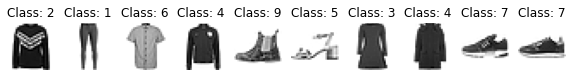

In [9]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
  plt.title('Class: ' + str(y_train[i].item()))

In [15]:
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 32), )
    
    self.decoder = nn.Sequential(
        nn.Linear(32, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.Linear(512, 28 * 28),)

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return encoded, decoded

In [17]:
# 학습을 위한 기본 Function 설정
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [34]:
# AE 모델 학습 진행
def train(model, train_loader, optimizer, log_interval):
  model.train() # 학습 상태로 지정
  for batch_idx, (image, _) in enumerate(train_loader): # label 값을 _으로 지정하여 생략
    image = image.view(-1, 28 * 28).to(DEVICE) # Flatten
    target = image.view(-1, 28 * 28).to(DEVICE)

    optimizer.zero_grad() # optimizer 의 그래디언트 초기화
    encoded, decoded = model(image)

    loss = criterion(decoded, target) # loss값 계산
    loss.backward()
    optimizer.step() # 그래디언트의 역전파

    if batch_idx % log_interval == 0:
      print(f"Train Epoch : {Epoch} [{batch_idx * len(image)} / {len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f} %) Train Loss: {loss.item():.6f}")
    




In [24]:
# 평가하는 함수
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  real_image = []
  gen_image = []

  with torch.no_grad():
    for image, _ in test_loader:
      image = image.view(-1, 28*28).to(DEVICE) # torch.Size([32, 784])
      target = image.view(-1, 28*28).to(DEVICE)

      encoded, decoded = model(image)

      test_loss += criterion(decoded, image).item()
      real_image.append(image.to('cpu'))
      gen_image.append(decoded.to('cpu'))

  test_loss /= len(test_loader.dataset) # 손실값 평균

  return test_loss, real_image, gen_image

Train Epoch : 1 [0 / 60000 (0 %) Train Loss: 0.021806
Train Epoch : 1 [6400 / 60000 (11 %) Train Loss: 0.018657
Train Epoch : 1 [12800 / 60000 (21 %) Train Loss: 0.019436
Train Epoch : 1 [19200 / 60000 (32 %) Train Loss: 0.015873
Train Epoch : 1 [25600 / 60000 (43 %) Train Loss: 0.016383
Train Epoch : 1 [32000 / 60000 (53 %) Train Loss: 0.018489
Train Epoch : 1 [38400 / 60000 (64 %) Train Loss: 0.016582
Train Epoch : 1 [44800 / 60000 (75 %) Train Loss: 0.015156
Train Epoch : 1 [51200 / 60000 (85 %) Train Loss: 0.014623
Train Epoch : 1 [57600 / 60000 (96 %) Train Loss: 0.014566

[EPOCH : 1], 	Test Loss: 0.0005


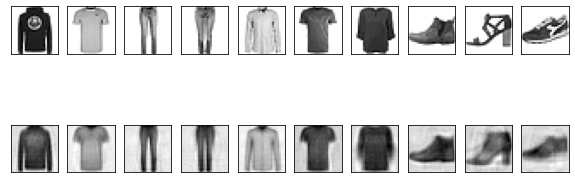

Train Epoch : 2 [0 / 60000 (0 %) Train Loss: 0.016419
Train Epoch : 2 [6400 / 60000 (11 %) Train Loss: 0.013694
Train Epoch : 2 [12800 / 60000 (21 %) Train Loss: 0.013827
Train Epoch : 2 [19200 / 60000 (32 %) Train Loss: 0.012359
Train Epoch : 2 [25600 / 60000 (43 %) Train Loss: 0.012207
Train Epoch : 2 [32000 / 60000 (53 %) Train Loss: 0.012819
Train Epoch : 2 [38400 / 60000 (64 %) Train Loss: 0.012537
Train Epoch : 2 [44800 / 60000 (75 %) Train Loss: 0.012948
Train Epoch : 2 [51200 / 60000 (85 %) Train Loss: 0.014864
Train Epoch : 2 [57600 / 60000 (96 %) Train Loss: 0.012179

[EPOCH : 2], 	Test Loss: 0.0004


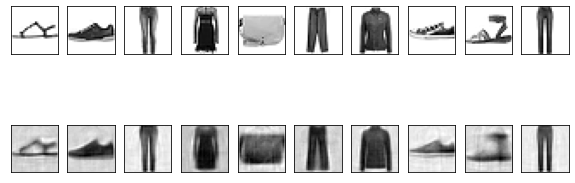

Train Epoch : 3 [0 / 60000 (0 %) Train Loss: 0.009511
Train Epoch : 3 [6400 / 60000 (11 %) Train Loss: 0.012557
Train Epoch : 3 [12800 / 60000 (21 %) Train Loss: 0.013362
Train Epoch : 3 [19200 / 60000 (32 %) Train Loss: 0.011627
Train Epoch : 3 [25600 / 60000 (43 %) Train Loss: 0.009693
Train Epoch : 3 [32000 / 60000 (53 %) Train Loss: 0.010524
Train Epoch : 3 [38400 / 60000 (64 %) Train Loss: 0.011455
Train Epoch : 3 [44800 / 60000 (75 %) Train Loss: 0.011940
Train Epoch : 3 [51200 / 60000 (85 %) Train Loss: 0.013296
Train Epoch : 3 [57600 / 60000 (96 %) Train Loss: 0.011325

[EPOCH : 3], 	Test Loss: 0.0004


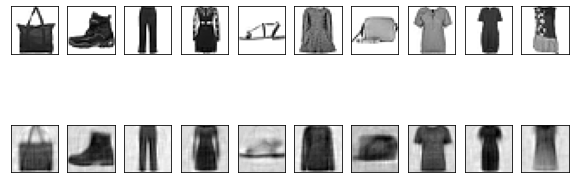

Train Epoch : 4 [0 / 60000 (0 %) Train Loss: 0.012974
Train Epoch : 4 [6400 / 60000 (11 %) Train Loss: 0.011814
Train Epoch : 4 [12800 / 60000 (21 %) Train Loss: 0.009488
Train Epoch : 4 [19200 / 60000 (32 %) Train Loss: 0.011836
Train Epoch : 4 [25600 / 60000 (43 %) Train Loss: 0.013707
Train Epoch : 4 [32000 / 60000 (53 %) Train Loss: 0.010138
Train Epoch : 4 [38400 / 60000 (64 %) Train Loss: 0.010322
Train Epoch : 4 [44800 / 60000 (75 %) Train Loss: 0.012513
Train Epoch : 4 [51200 / 60000 (85 %) Train Loss: 0.011252
Train Epoch : 4 [57600 / 60000 (96 %) Train Loss: 0.010358

[EPOCH : 4], 	Test Loss: 0.0004


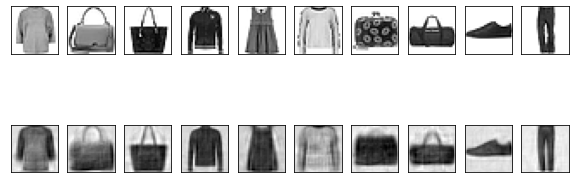

Train Epoch : 5 [0 / 60000 (0 %) Train Loss: 0.010515
Train Epoch : 5 [6400 / 60000 (11 %) Train Loss: 0.013270
Train Epoch : 5 [12800 / 60000 (21 %) Train Loss: 0.013434
Train Epoch : 5 [19200 / 60000 (32 %) Train Loss: 0.011755
Train Epoch : 5 [25600 / 60000 (43 %) Train Loss: 0.011786
Train Epoch : 5 [32000 / 60000 (53 %) Train Loss: 0.012036
Train Epoch : 5 [38400 / 60000 (64 %) Train Loss: 0.010887
Train Epoch : 5 [44800 / 60000 (75 %) Train Loss: 0.011158
Train Epoch : 5 [51200 / 60000 (85 %) Train Loss: 0.012223
Train Epoch : 5 [57600 / 60000 (96 %) Train Loss: 0.010916

[EPOCH : 5], 	Test Loss: 0.0003


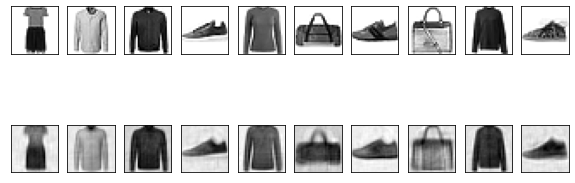

Train Epoch : 6 [0 / 60000 (0 %) Train Loss: 0.010179
Train Epoch : 6 [6400 / 60000 (11 %) Train Loss: 0.011504
Train Epoch : 6 [12800 / 60000 (21 %) Train Loss: 0.008537
Train Epoch : 6 [19200 / 60000 (32 %) Train Loss: 0.013134
Train Epoch : 6 [25600 / 60000 (43 %) Train Loss: 0.008727
Train Epoch : 6 [32000 / 60000 (53 %) Train Loss: 0.009537
Train Epoch : 6 [38400 / 60000 (64 %) Train Loss: 0.010903
Train Epoch : 6 [44800 / 60000 (75 %) Train Loss: 0.009173
Train Epoch : 6 [51200 / 60000 (85 %) Train Loss: 0.011039
Train Epoch : 6 [57600 / 60000 (96 %) Train Loss: 0.010156

[EPOCH : 6], 	Test Loss: 0.0003


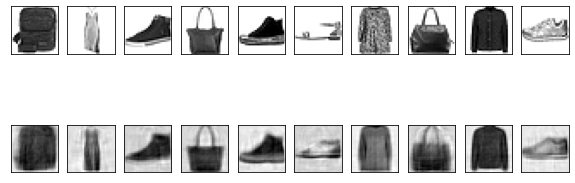

Train Epoch : 7 [0 / 60000 (0 %) Train Loss: 0.009930
Train Epoch : 7 [6400 / 60000 (11 %) Train Loss: 0.010398
Train Epoch : 7 [12800 / 60000 (21 %) Train Loss: 0.010613
Train Epoch : 7 [19200 / 60000 (32 %) Train Loss: 0.009210
Train Epoch : 7 [25600 / 60000 (43 %) Train Loss: 0.014012
Train Epoch : 7 [32000 / 60000 (53 %) Train Loss: 0.009662
Train Epoch : 7 [38400 / 60000 (64 %) Train Loss: 0.008180
Train Epoch : 7 [44800 / 60000 (75 %) Train Loss: 0.009293
Train Epoch : 7 [51200 / 60000 (85 %) Train Loss: 0.008262
Train Epoch : 7 [57600 / 60000 (96 %) Train Loss: 0.008714

[EPOCH : 7], 	Test Loss: 0.0003


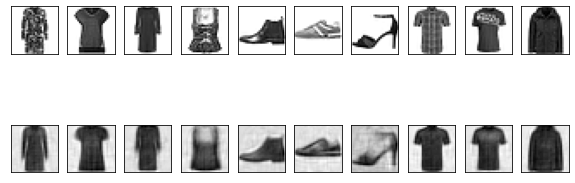

Train Epoch : 8 [0 / 60000 (0 %) Train Loss: 0.009551
Train Epoch : 8 [6400 / 60000 (11 %) Train Loss: 0.008954
Train Epoch : 8 [12800 / 60000 (21 %) Train Loss: 0.011591
Train Epoch : 8 [19200 / 60000 (32 %) Train Loss: 0.009610
Train Epoch : 8 [25600 / 60000 (43 %) Train Loss: 0.009763
Train Epoch : 8 [32000 / 60000 (53 %) Train Loss: 0.011024
Train Epoch : 8 [38400 / 60000 (64 %) Train Loss: 0.008739
Train Epoch : 8 [44800 / 60000 (75 %) Train Loss: 0.007710
Train Epoch : 8 [51200 / 60000 (85 %) Train Loss: 0.012390
Train Epoch : 8 [57600 / 60000 (96 %) Train Loss: 0.009534

[EPOCH : 8], 	Test Loss: 0.0003


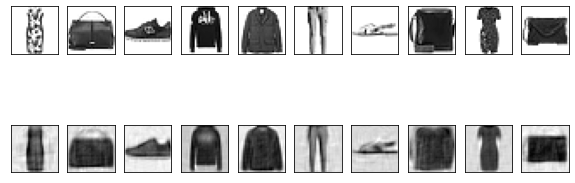

Train Epoch : 9 [0 / 60000 (0 %) Train Loss: 0.010813
Train Epoch : 9 [6400 / 60000 (11 %) Train Loss: 0.011236
Train Epoch : 9 [12800 / 60000 (21 %) Train Loss: 0.011334
Train Epoch : 9 [19200 / 60000 (32 %) Train Loss: 0.010501
Train Epoch : 9 [25600 / 60000 (43 %) Train Loss: 0.012549
Train Epoch : 9 [32000 / 60000 (53 %) Train Loss: 0.007264
Train Epoch : 9 [38400 / 60000 (64 %) Train Loss: 0.011230
Train Epoch : 9 [44800 / 60000 (75 %) Train Loss: 0.009435
Train Epoch : 9 [51200 / 60000 (85 %) Train Loss: 0.008714
Train Epoch : 9 [57600 / 60000 (96 %) Train Loss: 0.010174

[EPOCH : 9], 	Test Loss: 0.0003


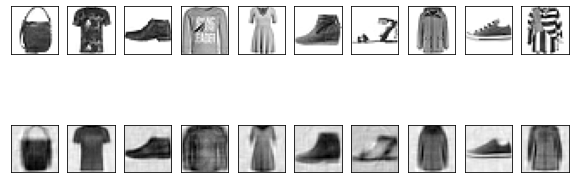

Train Epoch : 10 [0 / 60000 (0 %) Train Loss: 0.010462
Train Epoch : 10 [6400 / 60000 (11 %) Train Loss: 0.008685
Train Epoch : 10 [12800 / 60000 (21 %) Train Loss: 0.011144
Train Epoch : 10 [19200 / 60000 (32 %) Train Loss: 0.011771
Train Epoch : 10 [25600 / 60000 (43 %) Train Loss: 0.009588
Train Epoch : 10 [32000 / 60000 (53 %) Train Loss: 0.011310
Train Epoch : 10 [38400 / 60000 (64 %) Train Loss: 0.009947
Train Epoch : 10 [44800 / 60000 (75 %) Train Loss: 0.010982
Train Epoch : 10 [51200 / 60000 (85 %) Train Loss: 0.009621
Train Epoch : 10 [57600 / 60000 (96 %) Train Loss: 0.008494

[EPOCH : 10], 	Test Loss: 0.0003


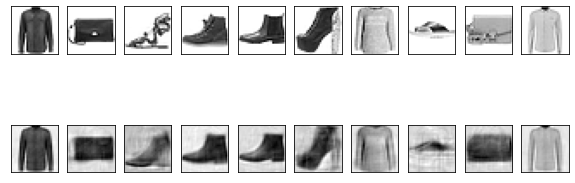

In [36]:
# 실제 학습 진행
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, real_image, gen_image = evaluate(model, test_loader)

  print(f"\n[EPOCH : {Epoch}], \tTest Loss: {test_loss:.4f}")

  f, a = plt.subplots(2, 10, figsize=(10,4))

  for i in range(10):
    img = np.reshape(real_image[0][i], (28, 28)) # 같은 데이터를 체크하기 위해...
    a[0][i].imshow(img, cmap='gray_r')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

  for i in range(10):
    img = np.reshape(gen_image[0][i], (28, 28))
    a[1][i].imshow(img, cmap='gray_r')
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())

  plt.show()

In [1]:
import torch
import numpy as np

In [48]:
x = torch.Tensor([0.5])
w1 = torch.Tensor([[0.1], [0.1]])
w2 = torch.Tensor([[0.4, 0.45], [0.5, 0.55]])
y = torch.Tensor([0.5, 0.5])

In [7]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.fc1 = torch.nn.Linear(1, 2, bias=False)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(2, 2, bias=False)
    self.act2 = torch.nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)


    return x

In [52]:
net = Net()

In [55]:
net.fc1.weight = torch.nn.Parameter(torch.Tensor([[0.1], [0.1]]))
net.fc2.weight = torch.nn.Parameter(torch.Tensor([[0.4, 0.45], [0.5, 0.55]]))

In [54]:
net.fc1.weight

Parameter containing:
tensor([[-0.5631],
        [ 0.9991]], requires_grad=True)

In [58]:
y = net.forward(x)

In [60]:
loss = torch.nn.MSELoss()

In [65]:
l = loss(y, torch.Tensor([0.5, 0.9]))

In [66]:
l.backward()

In [70]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
optimizer.step()

In [72]:
net.fc1.weight

Parameter containing:
tensor([[0.1013],
        [0.1014]], requires_grad=True)

In [73]:
net.fc2.weight

Parameter containing:
tensor([[0.3934, 0.4434],
        [0.5160, 0.5660]], requires_grad=True)